In [1]:
# @title **Step 1** - Install Prerequisites
from google.colab import output

!pip install diffusers accelerate transformers safetensors invisible-watermark>=0.2.0

output.clear()
print("All done!")

All done!


In [2]:
# @title **Step 2** - Mount Google Drive
from google.colab import drive, output
drive.mount('/content/drive')

%cd /content/drive/MyDrive
WORKSPACE = "/content/drive/MyDrive/AI"
![ ! -d $WORKSPACE ] && mkdir AI
%cd $WORKSPACE
![ ! -d "./outputs" ] && mkdir outputs models

output.clear()
print("All done!")

All done!


In [3]:
# @title **Step 3** - Download Models/Checkpoints/LoRAs
from google.colab import output

# SDXL - Animagine XL v3.1 (6.94GB)
!wget -c https://huggingface.co/cagliostrolab/animagine-xl-3.1/resolve/main/animagine-xl-3.1.safetensors -P ./models/

output.clear()
print("All done!")

All done!


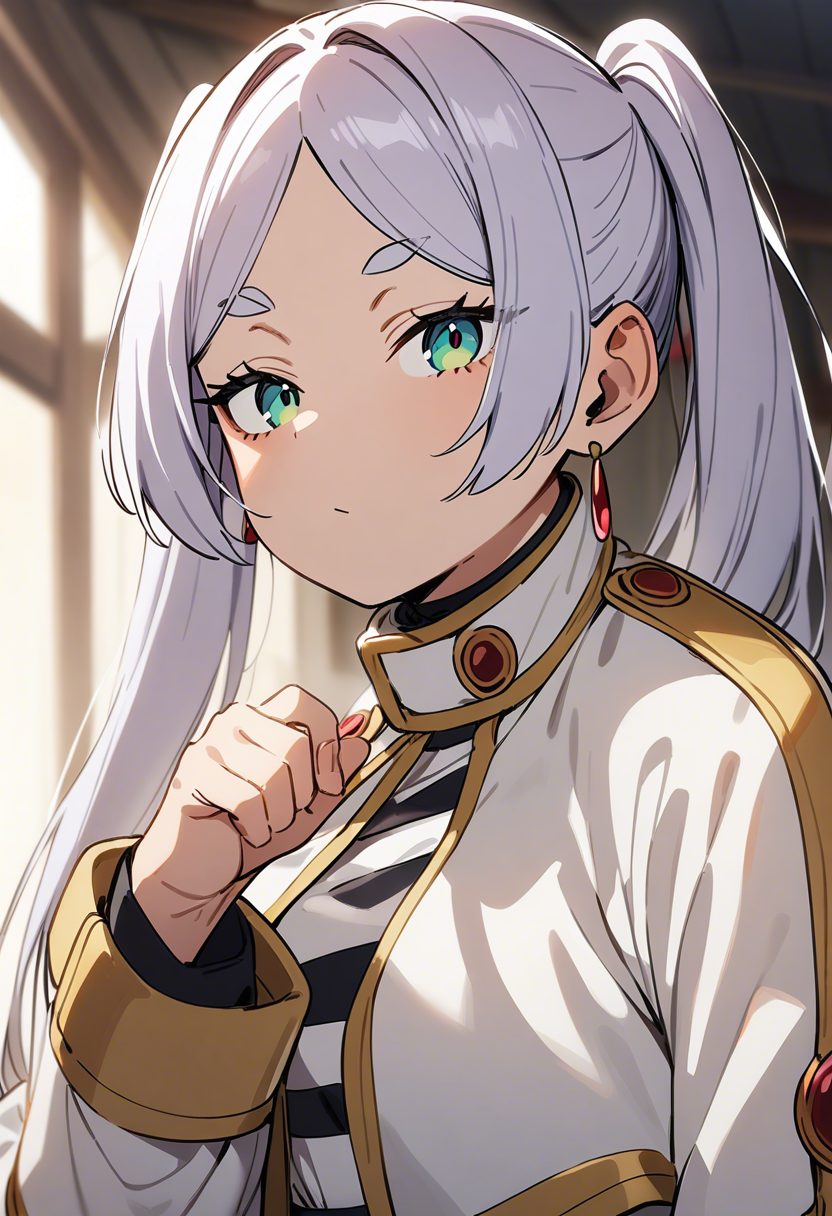

In [25]:
# @title **Step 4** - Setup Pipeline and Generate Images
from diffusers import StableDiffusionXLPipeline
from google.colab import output
import torch
import datetime

# define model
# @markdown # **Model**
# @markdown **Model Name**
model_base = "./models/"
model_name = "animagine-xl-3.1.safetensors" # @param {type:"string"}
model = model_base + model_name

# initialize pipline
pipeline = StableDiffusionXLPipeline.from_single_file(
    model,
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")

# settings
# @markdown ---
# @markdown # **Prompts**
# @markdown **Positives**
prompt = "1girl, frieren, sousou no frieren, masterpiece, best quality, safe, very aesthetic, absurdres" # @param {type:"string"}
# @markdown **Negatives**
negative_prompt = "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]" # @param {type:"string"}
# @markdown ---
# @markdown # **Resolution**
# @markdown **Width**
width = 832 # @param {type:"number"}
# @markdown **Height**
height = 1216 # @param {type:"number"}
# @markdown ---
# @markdown # **Advanced**
# @markdown **CFG**
guidance_scale = 7 # @param {type:"number"}
# @markdown **Steps**
num_inference_steps = 28 # @param {type:"integer"}



# generate image
image = pipeline(
    prompt,
    negative_prompt=negative_prompt,
    width=width,
    height=height,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps
).images[0]

# clear output
output.clear()

# save image
# @markdown ---
# @markdown # **Auto Save Image**
# @markdown *Enable if you want to automatically save the generated image.*<br>
save_image = False # @param {type:"boolean"}
image_base = "./outputs/"
image_prefix = "frieren" # @param {type:"string"}
image_date = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
image_path = image_base + image_prefix + "_" + image_date + ".png"

if save_image:
  image.save(image_path)

# display image
image